<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [22]:
y = df.loc[:,['price']].values
X = df.drop(columns=['price']).values
y.shape

(8495, 1)

In [14]:
X.shape

(8495, 8)

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.5)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
model = LinearRegression()
prediction = model.fit(Xtrain, ytrain)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [25]:
print('coefficients: ', model.coef_[0])
print('intercepts: ', model.intercept_)

coefficients:  [  -50.5265399  -1796.68364496   -36.9016698    244.86492938
  -713.29958335  4995.19250505  1235.98747992  8898.62810868]
intercepts:  [-2461135.34574054]


## 1.5 Use the test data to make predictions

In [0]:
prediction = model.fit(Xtrain, ytrain).predict(Xtest)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [27]:
RMSE = (np.sqrt(mean_squared_error(ytest, prediction)))
Rsquared = r2_score(ytest, prediction)
print('root mean squared error:',RMSE)
print('R-squared: ',Rsquared)

root mean squared error: 17893.419628694035
R-squared:  0.3283452771029979


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient of year is 1235.98747992, which means it is likely relevant in scaling/influencing the regression line (a coefficient near zero is said to not have relevance). That being said there are coefs even higher absolutely than this and it could be indicative these calculations have high p-values (ie not necessarily as significant as they look).

## 1.8 How should we interpret the Root-Mean-Square Error?

Root mean squared error is an estimate of the typical length of residuals (the difference between a point and the line). It shouldn't be nearly 18,000.

## 1.9 How should we interpret the $R^2$?

R squared is the percentage of our data whose influence is explained by linear regression line. By not doing outlier removal or feature engineering only 32% of our data is currently explained.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['price_log'] = np.log(df.price)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

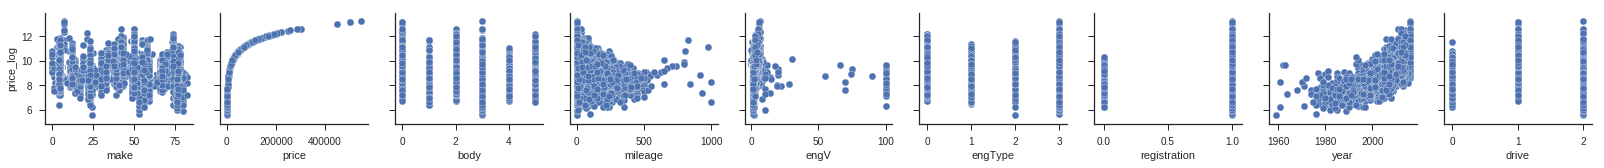

In [30]:
Xlabels = df.columns.drop('price_log')

import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['price_log'], x_vars=Xlabels)
#polynomial canidates: mileage, year

## 2.3 If appropriate, create any polynomial features. 

In [0]:
df['year_squared'] = df.year ** 2
df['mileage_squared'] = df.mileage ** 2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
y = df.loc[:, ['price_log']].values
X = df.drop(columns = ['price', 'price_log']).values

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.5,
                                                random_state=42)

model.fit(Xtrain, ytrain)

prediction = model.predict(Xtest)

RMSE = (np.sqrt(mean_squared_error(ytest, prediction)))
Rsquared = r2_score(ytest, prediction)

print('root mean squared error:',RMSE)
print('R-squared: ',Rsquared)

print('coefficients: ', model.coef_[0])
print('intercepts: ', model.intercept_)

root mean squared error: 0.5555739782623862
R-squared:  0.6721433400179758
coefficients:  [-1.60668375e-03 -8.64387922e-02  9.84119698e-04  9.60759460e-03
 -4.80294292e-02  6.72177364e-01 -6.45583602e+00  3.83372383e-01
  1.63788682e-03 -6.05343073e-07]
intercepts:  [6367.88492351]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Year's coefficient is now much lower, as it is in every category. This could mean the line is generally less sensitive.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent is used to find the global minimum of a cost function. The cost function scores the difference between a regression line and the dataset's actual y values. By association, gradient descent is minimizing the error between a regression line and its values.

## 3.2 What is the "Learning Rate" and what is its function?

The gradient descent equation's learning rate, a, represents the amount of updating the function makes each iteration. This parameter keeps the function moving on the same direction rather than jumping and producing misleading results.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
#reset df
df['price_log'] = np.log(df.price)
df['year_squared'] = df.year ** 2
df['mileage_squared'] = df.mileage ** 2

y = df['price_log']

X = df.drop(columns = ['price', 'price_log'])
X = sm.add_constant(X)

In [36]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1753.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:17:49   Log-Likelihood:                -6963.9
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8484   BIC:                         1.403e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6524.4284    348.589     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [37]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

[3417162393.281383, 1.0604357815123744, 1.1700158474025226, 7.512926111854284, 1.0105817507356412, 1.171764363539346, 1.1087266992866478, 164006.04096347353, 1.1404985918994788, 164341.01383629531, 5.067267264795855]


The constant, year and year squared have large VIFs, but no infinity nonsense.